In [3]:
import numpy as np
from matplotlib import pylab as plt
from importlib import reload

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

In [41]:
func_name = "quadratic"
d = 100
L = 1000
mu = 1
sigma = 0

args = init_experiment(func_name, d, seed=18, L=L, mu=mu)
## тоже наверно надо в run_experiments
sett = L2Ball(radius=1)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

## Finding x_sol

In [44]:
def learning_rate(k):
    return 1./(k+1000)

In [46]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|██████████| 10000/10000 [00:00<00:00, 18288.60it/s]


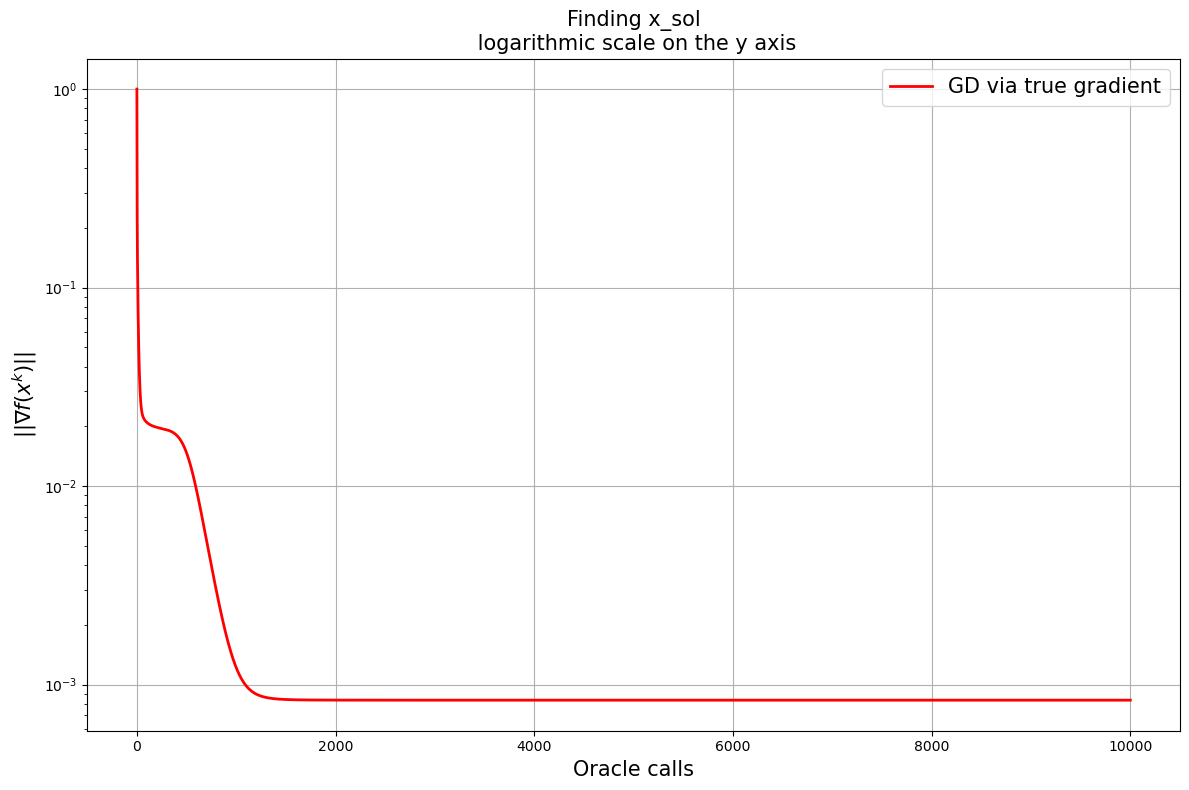

In [47]:
make_err_plot([GD], labels=["GD via true gradient"], title='Finding x_sol')
x_sol = GD.x_curr

## Разные аппроксиматоры для GD

In [48]:
def learning_rate_jaguar(k):
    return 1./(k + 8 * d**2)

def learning_rate_lame(k):
    return 1. / L

def learning_rate_turtle(k):
    return 1./(k + 8 * d)

In [49]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)
approx_list = [Jaguar, Lame, Turtle]
#approx_list = [Lame]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]
#lr_list = [learning_rate_lame]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = GDOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|██████████| 100/100 [00:02<00:00, 44.73it/s]


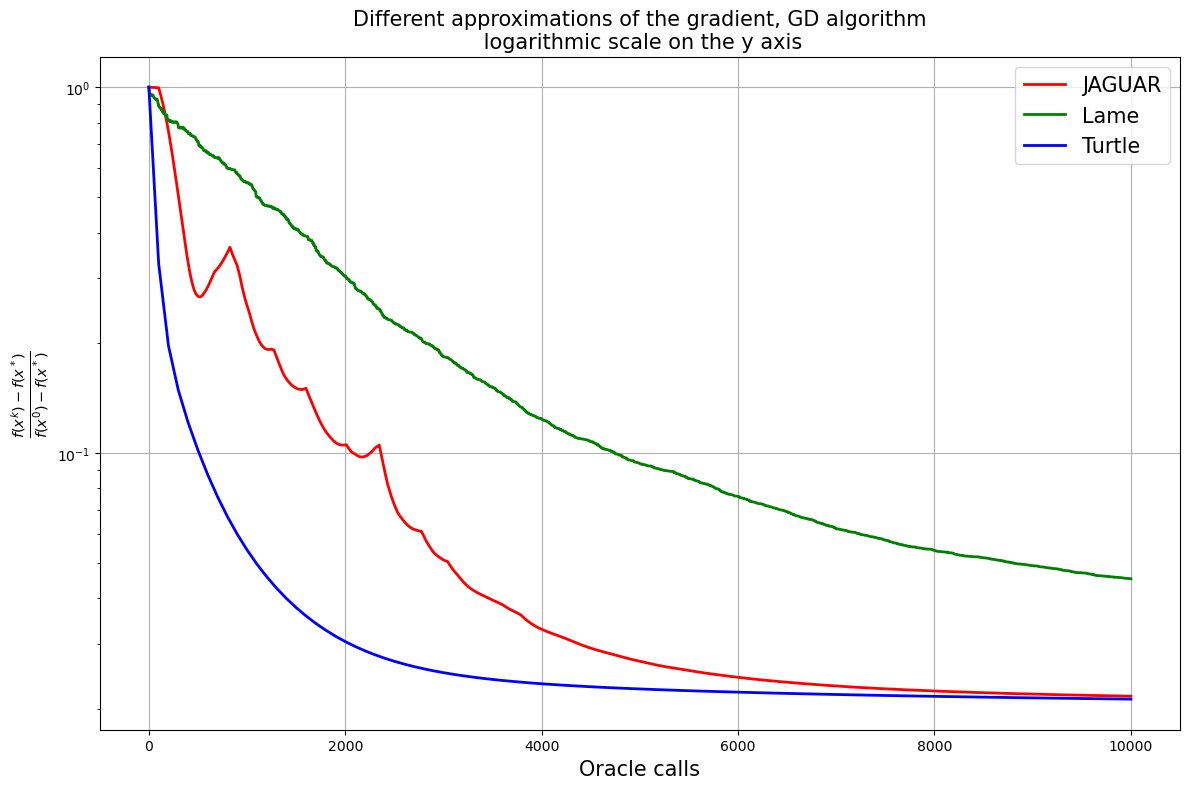

In [50]:
make_err_plot(optimizers_list)

## Разные аппроксиматоры для FW

In [54]:
def learning_rate_jaguar(k):
    return 1./(k + 8 * d**2)

def learning_rate_lame(k):
    return 10. / L

def learning_rate_turtle(k):
    return 1./(k + 8 * d)

In [55]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)
approx_list = [Jaguar, Lame, Turtle]
#approx_list = [Lame]
lr_list = [learning_rate_lame, learning_rate_lame, learning_rate_lame]
#lr_list = [learning_rate_lame]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

 74%|███████▍  | 74/100 [00:01<00:00, 43.26it/s]

Precision 1e-06 achieved at step 74!


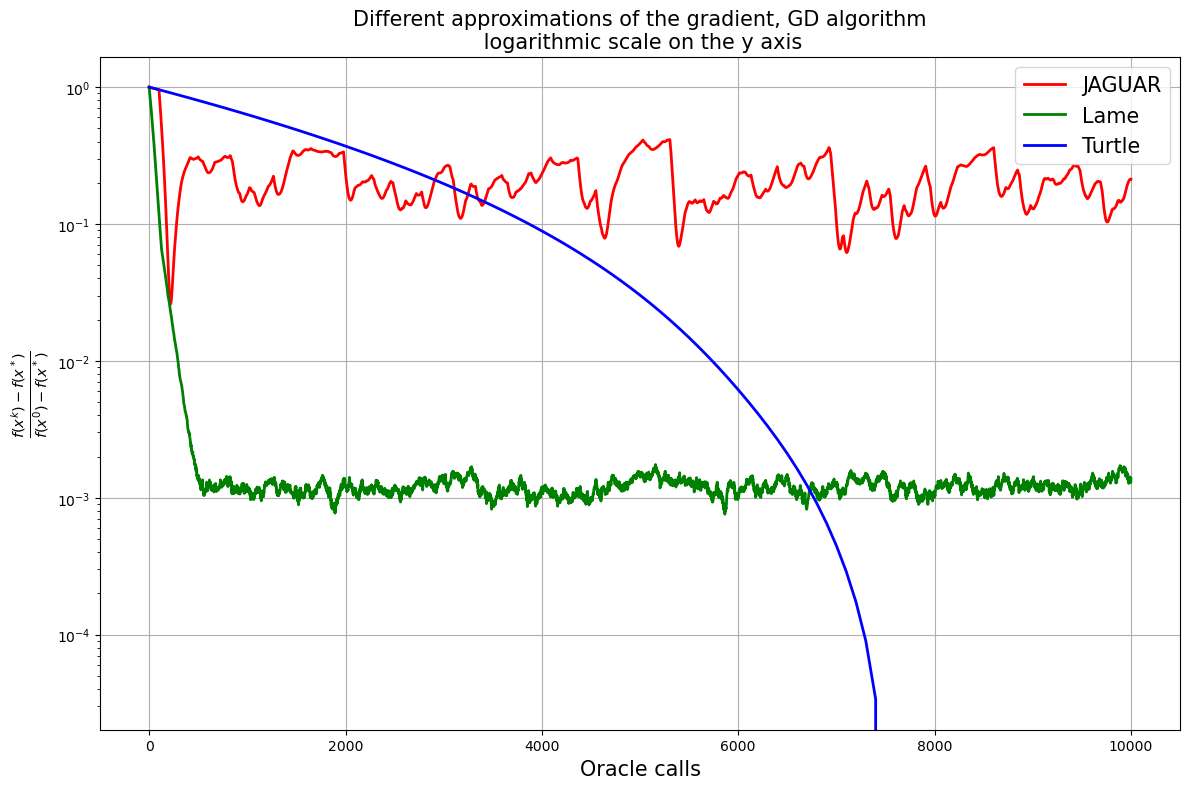

In [56]:
make_err_plot(optimizers_list)

In [ ]:
# 

# LogReg or smth idk...

In [ ]:
import numpy as np
from matplotlib import pylab as plt
from importlib import reload

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

In [4]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=0.5)
L = 20

args = init_experiment(func_name, d, sigma=sigma)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [5]:
def learning_rate(k):
    return 1./ (10 * L)

In [16]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:35<00:00, 104.86it/s]


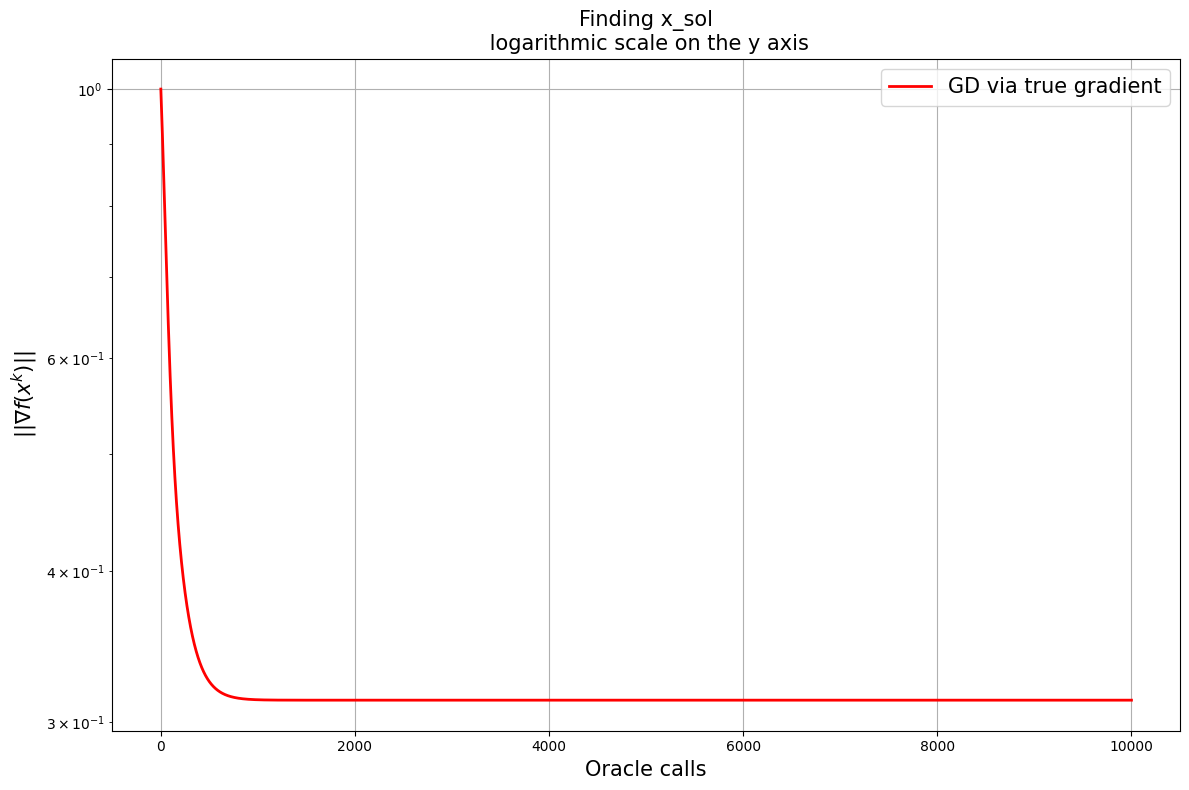

0.49999999999999994


In [17]:
make_err_plot([GD], labels=["GD via true gradient"], title='Finding x_sol')
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [18]:
L = 20

In [19]:
def learning_rate_jaguar(k):
    return 0.2/L

def learning_rate_jaguar_batched(k):
    return 0.6/L

def learning_rate_lame(k):
    return 20. / L # ???

def learning_rate_turtle(k):
    return 10./ L # random value

def learning_rate_truth(k):
    return 1 / L

In [20]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
JaguarBatched = JaguarApproximator(oracle, gamma=1e-5, batch_size=3)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)
Truth = TrueGradientApproximator(func_name, args=args) 
# approx_list = [Jaguar, Lame, Turtle]
# lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]
# approx_list = [Jaguar]
# lr_list = [learning_rate_jaguar]
# approx_list = [Lame]
# lr_list = [learning_rate_lame]
# approx_list = [Jaguar, Turtle]
# lr_list = [learning_rate_jaguar, learning_rate_turtle]
approx_list = [JaguarBatched, Jaguar]
lr_list = [learning_rate_jaguar_batched, learning_rate_jaguar]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = GDOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3, tol=1e-8)
    opt.optimize()
    optimizers_list.append(opt)

  0%|          | 0/815 [00:00<?, ?it/s]

100%|██████████| 2445/2445 [02:18<00:00, 17.64it/s]


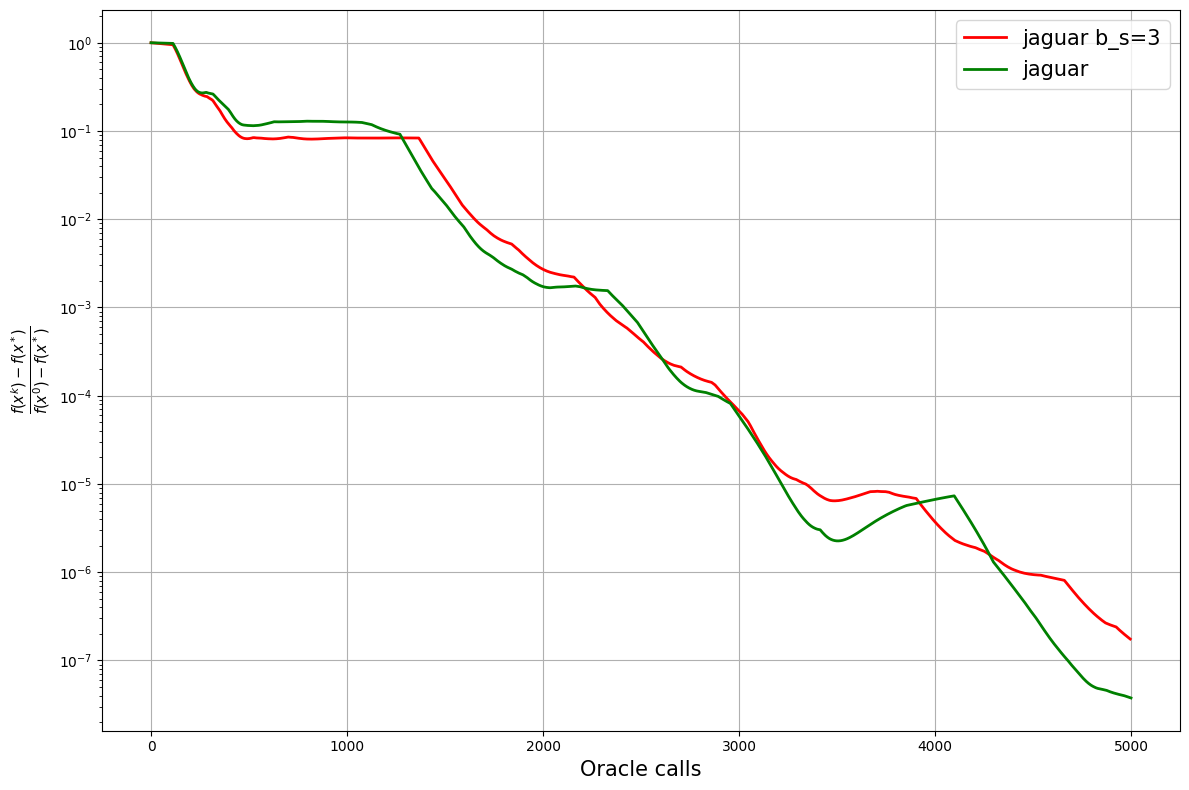

In [21]:
make_err_plot(optimizers_list, labels=['jaguar b_s=3', 'jaguar', 'turtle'])

In [21]:
np.linalg.norm(x_sol)

0.49999999999999994

In [31]:
def learning_rate_jaguar(k):
    return 1./(k + L)

def learning_rate_jaguar_batched(k):
    return 1./(k + L)

def learning_rate_lame(k):
    return 1. / (k + L)

def learning_rate_turtle(k):
    return 1./ (k + L)

def learning_rate_truth(k):
    return 1 / (k + L)

In [32]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
JaguarBatched = JaguarApproximator(oracle, gamma=1e-5, batch_size=3)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)
# approx_list = [Jaguar, Lame, Turtle]
# lr_list = [learning_rate_lame, learning_rate_lame, learning_rate_lame]
# approx_list = [Lame]
# lr_list = [learning_rate_lame]
# approx_list = [Jaguar]
# lr_list = [learning_rate_jaguar]

approx_list = [JaguarBatched, Jaguar]
lr_list = [learning_rate_jaguar_batched, learning_rate_jaguar]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=2 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

  0%|          | 0/2445 [00:00<?, ?it/s]

100%|██████████| 44/44 [03:47<00:00,  5.18s/it]


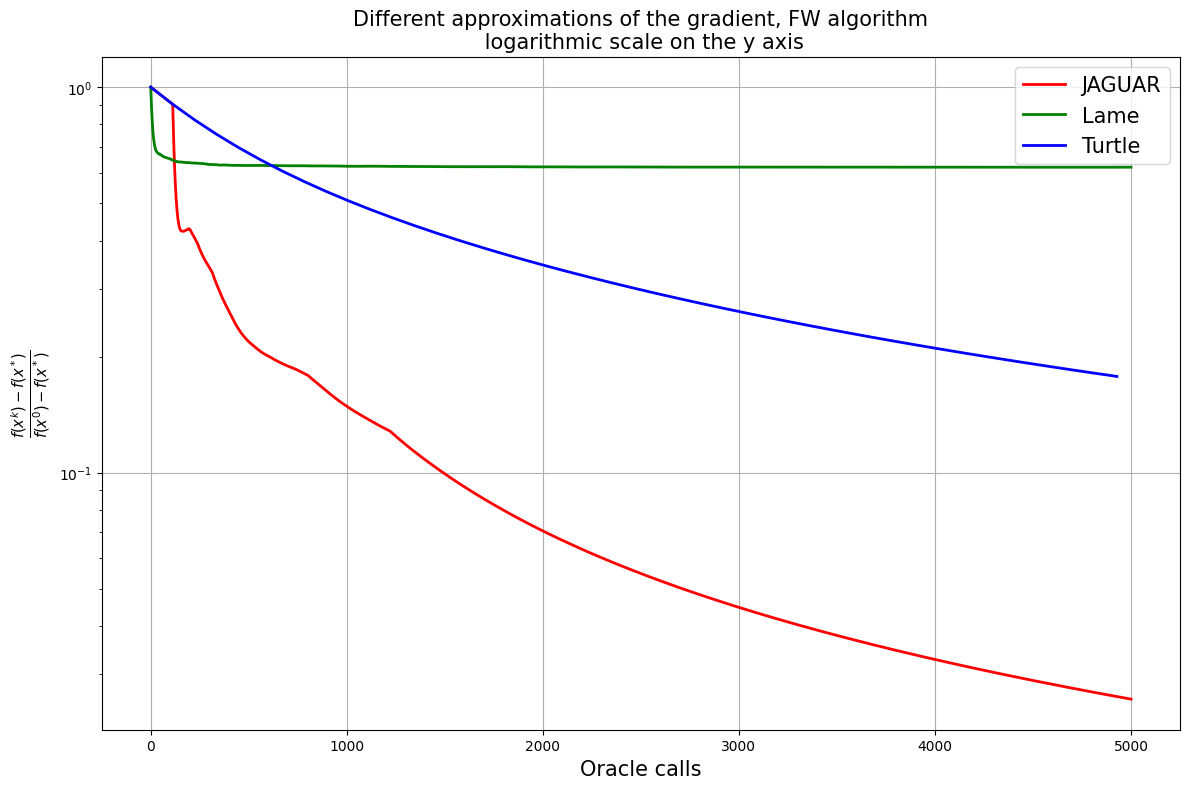

In [33]:
make_err_plot(optimizers_list)

In [128]:
np.linalg.norm(x_0)

1.0

# dont touch this!!!!

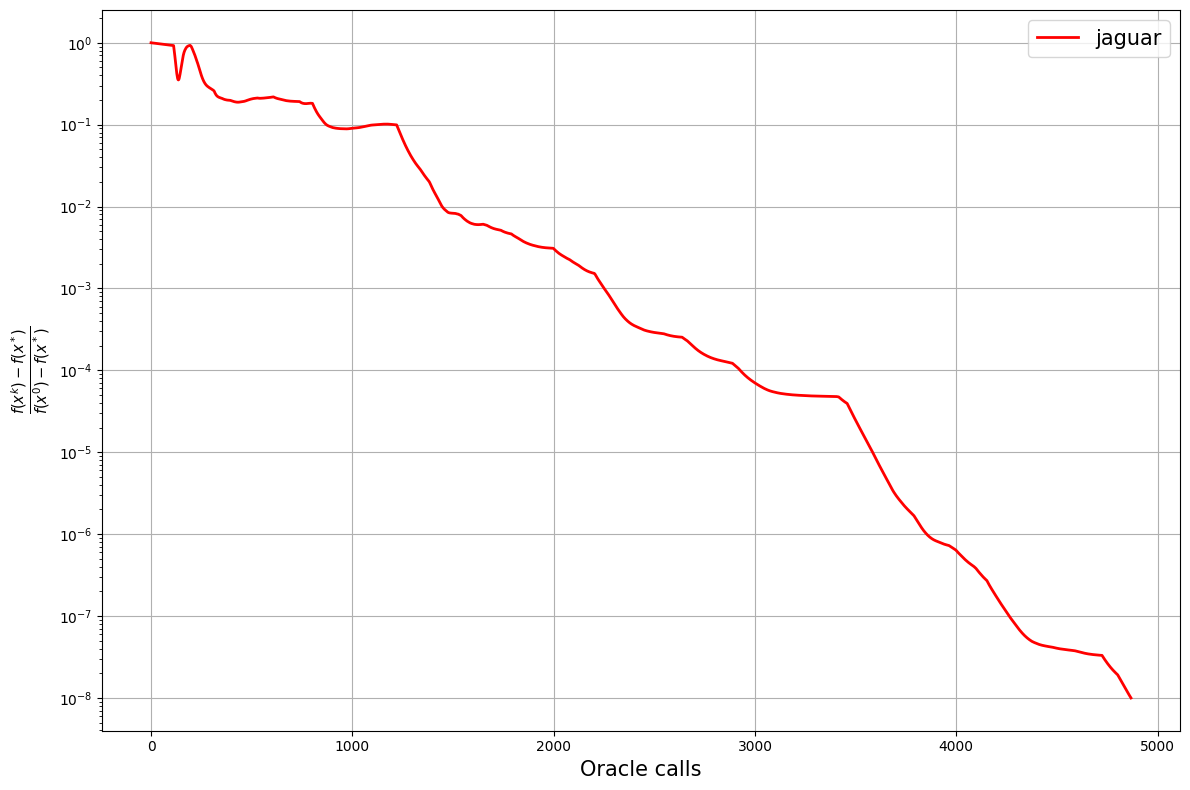

In [75]:
make_err_plot(optimizers_list)